In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv('Dataset/Train.csv',na_values=['?','nan'])
df.head()

,timestamp,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
0,2019-02-23 00:00:00,67.92,0.0,55.72,0.0,-1.56,1.0,26.57,1.0,19.52,55.04,101.50,2.13,6.30,225.00
1,2019-02-23 00:05:00,67.89,0.0,55.74,0.0,-1.51,1.0,26.58,1.0,19.49,55.17,101.50,2.01,10.46,123.75
2,2019-02-23 00:10:00,67.86,0.0,55.77,0.0,-1.47,1.0,26.59,1.0,19.47,55.30,101.51,1.90,14.63,22.50
3,2019-02-23 00:15:00,67.84,0.0,55.79,0.0,-1.42,1.0,26.61,1.0,19.54,54.20,101.51,2.28,16.08,123.75
4,2019-02-23 00:20:00,67.81,0.0,55.82,0.0,-1.38,1.0,26.62,1.0,19.61,53.09,101.51,2.66,17.52,225.00


In [4]:
sh4_df=df[['Soil humidity 4','Irrigation field 4','Air temperature (C)',
                   'Air humidity (%)','Pressure (KPa)','Wind speed (Km/h)',
                   'Wind gust (Km/h)','Wind direction (Deg)']]
sh4_df.head()

,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
0,26.57,1.0,19.52,55.04,101.50,2.13,6.30,225.00
1,26.58,1.0,19.49,55.17,101.50,2.01,10.46,123.75
2,26.59,1.0,19.47,55.30,101.51,1.90,14.63,22.50
3,26.61,1.0,19.54,54.20,101.51,2.28,16.08,123.75
4,26.62,1.0,19.61,53.09,101.51,2.66,17.52,225.00


In [5]:
sh4_df.isnull().sum()

Soil humidity 4         1743
Irrigation field 4        20
Air temperature (C)     4054
Air humidity (%)        4054
Pressure (KPa)          4054
Wind speed (Km/h)       4054
Wind gust (Km/h)        4054
Wind direction (Deg)    4054
dtype: int64

In [6]:
sh4_df = pd.DataFrame(sh4_df)

# Removing null values
sh4_df.dropna(inplace=True)

In [7]:
sh4_df.isnull().sum()

Soil humidity 4         0
Irrigation field 4      0
Air temperature (C)     0
Air humidity (%)        0
Pressure (KPa)          0
Wind speed (Km/h)       0
Wind gust (Km/h)        0
Wind direction (Deg)    0
dtype: int64

In [8]:
sh4_df.describe()

,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
count,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000
mean,18.051564,0.219546,24.263780,58.521052,101.131418,9.896898,41.744905,93.983796
std,14.434120,0.413948,6.756751,30.073448,0.218448,4.325666,24.168987,100.502500
min,-30.000000,0.000000,11.220000,0.590000,100.500000,0.000000,0.000000,0.000000
25%,8.450000,0.000000,18.580000,33.980000,100.980000,6.830000,21.820000,22.500000
50%,20.150000,0.000000,22.150000,61.310000,101.120000,9.530000,37.240000,22.500000
75%,29.700000,0.000000,29.590000,86.360000,101.260000,12.460000,59.275000,180.000000
max,47.000000,1.000000,45.560000,96.000000,101.860000,31.360000,133.330000,337.500000


In [9]:
sh4_df.head()

,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
0,26.57,1.0,19.52,55.04,101.50,2.13,6.30,225.00
1,26.58,1.0,19.49,55.17,101.50,2.01,10.46,123.75
2,26.59,1.0,19.47,55.30,101.51,1.90,14.63,22.50
3,26.61,1.0,19.54,54.20,101.51,2.28,16.08,123.75
4,26.62,1.0,19.61,53.09,101.51,2.66,17.52,225.00


In [10]:
sh4_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23995 entries, 0 to 26300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Soil humidity 4       23995 non-null  float64
 1   Irrigation field 4    23995 non-null  float64
 2   Air temperature (C)   23995 non-null  float64
 3   Air humidity (%)      23995 non-null  float64
 4   Pressure (KPa)        23995 non-null  float64
 5   Wind speed (Km/h)     23995 non-null  float64
 6   Wind gust (Km/h)      23995 non-null  float64
 7   Wind direction (Deg)  23995 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [11]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

from keras.layers import Dropout
import tensorflow as tf

# Check if GPU is available and set TensorFlow to use GPU
if tf.test.gpu_device_name():
    print('GPU is available')
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    if len(physical_devices) > 0:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU is not available. Make sure you have installed the GPU version of TensorFlow.")

# Normalize the data
scaler = MinMaxScaler()
sh4_df = scaler.fit_transform(sh4_df)


GPU is not available. Make sure you have installed the GPU version of TensorFlow.


In [12]:
sh4_df[0][47:58]

array([], dtype=float64)

In [13]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data.iloc[i:i + seq_length + 1]  # +1 to capture the target value ahead in time
        sequences.append(sequence.values)
    return np.array(sequences)

# Define sequence length and split data into sequences
sequence_length = 144  # Modify this based on the length you want to consider
sh4_df = pd.DataFrame(sh4_df)
sequences = create_sequences(sh4_df, sequence_length)

# Set the ratio for splitting data
split_ratio = 0.8  # 80% train, 20% test

# Calculate the split index based on time sequence
split_index = int(len(sequences) * split_ratio)

# Split the data into training and testing sets based on time sequence
train_sequences = sequences[:split_index]
test_sequences = sequences[split_index:]

X_train = train_sequences[:, :-1, :]  # Features for training
y_train = train_sequences[:, -1, 0]   # Target variable for training

X_test = test_sequences[:, :-1, :]    # Features for testing
y_test = test_sequences[:, -1, 0]     # Target variable for testing

In [14]:
print(y_train[0:10])

[0.75428571 0.75441558 0.75454545 0.75467532 0.75480519 0.75493506
 0.75506494 0.75519481 0.75532468 0.75545455]


In [17]:
# Build the LSTM model with three LSTM layers and dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [18]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/10
597/597 [==============================] - 137s 222ms/step - loss: 0.0082
Epoch 2/10
597/597 [==============================] - 94s 157ms/step - loss: 0.0029
Epoch 3/10
597/597 [==============================] - 95s 160ms/step - loss: 0.0022
Epoch 4/10
597/597 [==============================] - 96s 161ms/step - loss: 0.0018
Epoch 5/10
597/597 [==============================] - 97s 163ms/step - loss: 0.0014
Epoch 6/10
597/597 [==============================] - 96s 161ms/step - loss: 0.0011
Epoch 7/10
597/597 [==============================] - 96s 161ms/step - loss: 8.1246e-04
Epoch 8/10
597/597 [==============================] - 97s 162ms/step - loss: 6.6394e-04
Epoch 9/10
597/597 [==============================] - 96s 161ms/step - loss: 5.5987e-04
Epoch 10/10
150/150 [==============================] - 9s 52ms/step - loss: 2.5201e-04
Test Loss: 0.00025201262906193733
150/150 [==============================] - 9s 52ms/step


In [39]:
# Save the trained model
model.save("LSTM10epoch")

INFO:tensorflow:Assets written to: LSTM10epoch\assets


INFO:tensorflow:Assets written to: LSTM10epoch\assets


In [43]:
# To load the saved model back
model = tf.keras.models.load_model("LSTM10epoch")
# Make predictions
predictions = model.predict(X_test)

150/150 [==============================] - 9s 54ms/step


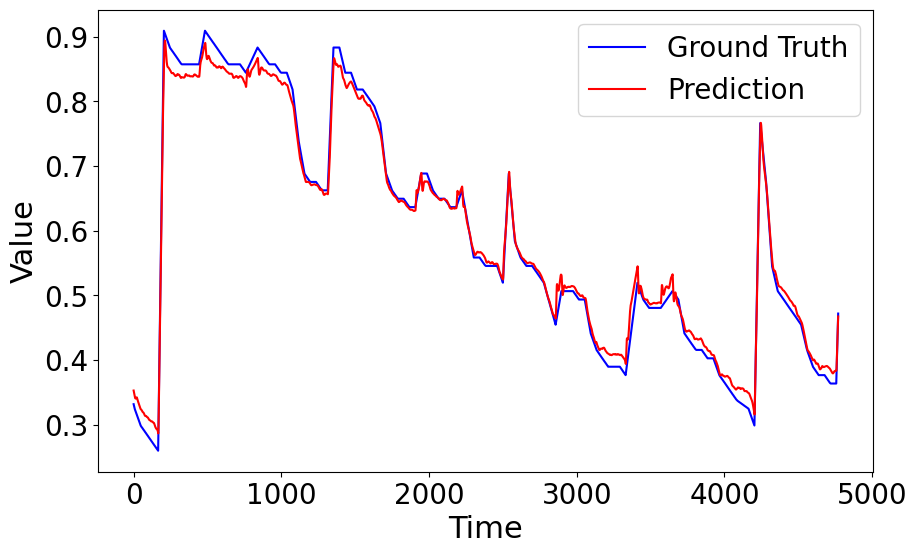

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Plotting the predictions and ground-truth values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Ground Truth', color='blue')
plt.plot(predictions, label='Prediction', color='red')
# plt.title('Prediction and ground truth')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [20]:
def iterative_attack_regression(model, input_sample, target_value, feature_indices, epsilon, num_iter):
    adv_sample = tf.convert_to_tensor(input_sample, dtype=tf.float32)  # Convert to TensorFlow tensor
    adv_min = adv_sample - epsilon
    adv_max = adv_sample + epsilon
    internal_epsilon = 0.008
    for i in range(num_iter):
        with tf.GradientTape() as tape:
            tape.watch(adv_sample)
            # Reshape adv_sample to match the model input shape
            adv_sample_reshaped = tf.reshape(adv_sample, (-1, 144, 8))  # Reshape to match the desired input shape
            prediction = model(adv_sample_reshaped)
            loss = tf.keras.losses.mean_squared_error(tf.constant(target_value, shape=prediction.shape), prediction)
            
        gradient = tape.gradient(loss, adv_sample_reshaped)
        gradient = tf.reshape(gradient, adv_sample.shape)  # Reshape the gradient to match adv_sample's shape
        
        # Apply perturbation to the selected features
        perturbations = tf.stack([internal_epsilon * tf.sign(gradient[:, index]) for index in feature_indices], axis=1)
#         perturbations = tf.clip_by_value(perturbations, - epsilon, epsilon)  # Clip the perturbations
        
        # Apply the perturbations only to the specified features
#         perturbed_sample = adv_sample - perturbations
        perturbed_sample = adv_sample - tf.reduce_sum(perturbations[:, :, tf.newaxis] * tf.one_hot(feature_indices, depth=8), axis=1)
        adv_sample = tf.clip_by_value(perturbed_sample, adv_min, adv_max)
        adv_sample = tf.clip_by_value(perturbed_sample, 0.0, 1.0)  # Assuming input values are normalized
        
    return adv_sample.numpy()  # Convert the adversarial sample back to NumPy array


In [21]:
# Choose an index from your dataset to generate adversarial samples
index = 120  # Change this index as needed

# Get the input sample
input_sample = X_test[index]

# Set the target value for the adversarial attack
# target_value = 0.5
target_value = y_test[index] + 0.1

# Perform the iterative targeted attack to generate an adversarial sample
epsilon = 0.05  # Perturbation magnitude
num_iter = 30    # Number of iterations


# adversarial_sample = iterative_attack_regression(model, input_sample, target_value, epsilon, num_iter)
# adversarial_sample = iterative_attack_regression(model, input_sample, target_value, feature_index, epsilon, num_iter)
# Feature indices to perturb
feature_indices = [2, 3, 4, 5, 6, 7]
# Call the iterative_attack_regression function
adversarial_sample = iterative_attack_regression(model, input_sample, target_value, feature_indices, epsilon, num_iter)

# Predictions on the original and adversarial samples
original_prediction = model.predict(input_sample[np.newaxis, ...])
adversarial_prediction = model.predict(adversarial_sample[np.newaxis, ...])

print("Original Prediction:", original_prediction)
print("Adversarial Prediction:", adversarial_prediction)

1/1 [==============================] - 0s 19ms/step
Original Prediction: [[0.3049968]]
Adversarial Prediction: [[0.3600784]]


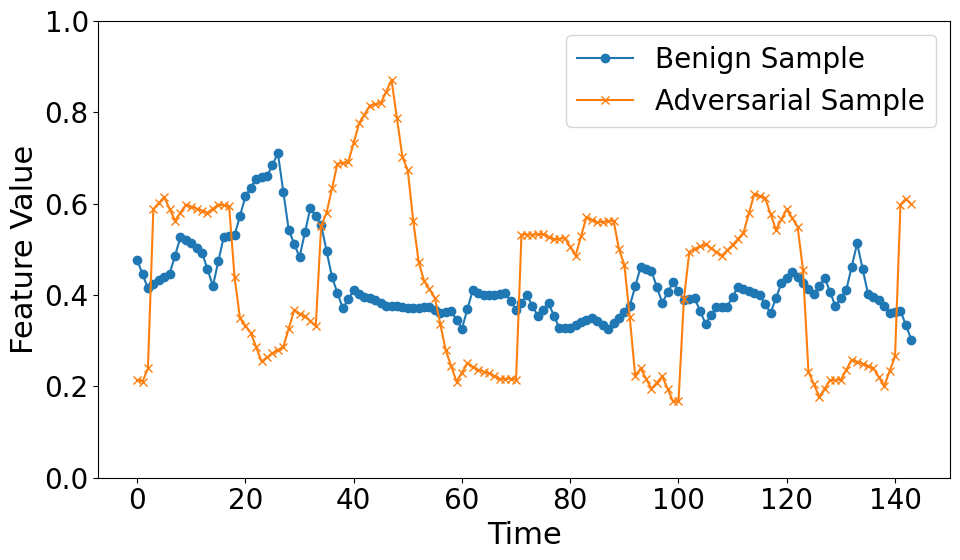

In [37]:
import matplotlib.pyplot as plt

# Choose an index from your dataset to generate adversarial samples
# index = 4  # Change this index as needed

# Get the time-series data for the first feature from the benign and adversarial samples

feature_index = 5

benign_time_series = X_test[index][:, feature_index]
adversarial_time_series = adversarial_sample[:, feature_index]

# %matplotlib qt

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the time-series data for the benign and adversarial samples
ax.plot(benign_time_series, label='Benign Sample', linestyle='-', marker='o')
ax.plot(adversarial_time_series, label='Adversarial Sample', linestyle='-', marker='x')

ax.set_xlabel('Time')
ax.set_ylabel('Feature Value')
# ax.set_title('Perturbation Amplitude Comparison for Time-Series Feature')
ax.legend()
# Set y-axis limits to [0, 1]
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()


In [23]:
# Define an empty list to store adversarial samples
adversarial_samples = []

# Set the target value for the adversarial attack


# Perform the iterative targeted attack on all testing samples
epsilon = 0.05  # Perturbation magnitude
num_iter = 20    # Number of iterations

num_samples = 100
for i in range(0,num_samples):
    input_sample = X_test[i]
    target_value = y_test[i] + 0.1
#     adversarial_sample = iterative_attack_regression(model, input_sample, target_value, epsilon, num_iter)
    adversarial_sample = iterative_attack_regression(model, input_sample, target_value, feature_indices, epsilon, num_iter)
    adversarial_samples.append(adversarial_sample)

# Convert the list of adversarial samples to a NumPy array
adversarial_samples = np.array(adversarial_samples)

# Predictions on the original and adversarial samples
original_predictions = model.predict(X_test)
adversarial_predictions = model.predict(adversarial_samples)

print("Original Predictions:", original_predictions)
print("Adversarial Predictions:", adversarial_predictions)


4/4 [==============================] - 0s 37ms/step
Original Predictions: [[0.3527825 ]
 [0.3516148 ]
 [0.35036606]
 ...
 [0.4566805 ]
 [0.4618617 ]
 [0.4672787 ]]
Adversarial Predictions: [[0.3934813 ]
 [0.39230052]
 [0.39124158]
 [0.38997614]
 [0.38851726]
 [0.38709056]
 [0.3855133 ]
 [0.38416207]
 [0.38299212]
 [0.38208336]
 [0.38152045]
 [0.38105497]
 [0.38073793]
 [0.38054997]
 [0.38062328]
 [0.3809144 ]
 [0.3812778 ]
 [0.3816718 ]
 [0.38213608]
 [0.382715  ]
 [0.3830748 ]
 [0.3831163 ]
 [0.38276464]
 [0.38206264]
 [0.38118297]
 [0.38009793]
 [0.3787828 ]
 [0.37740347]
 [0.37620032]
 [0.37502426]
 [0.37382823]
 [0.3726225 ]
 [0.3715334 ]
 [0.37058717]
 [0.36974692]
 [0.36900902]
 [0.36828664]
 [0.36760178]
 [0.36684746]
 [0.36599272]
 [0.36501262]
 [0.3639041 ]
 [0.36272573]
 [0.3615053 ]
 [0.3604668 ]
 [0.3597216 ]
 [0.35930836]
 [0.35900855]
 [0.3586412 ]
 [0.3584727 ]
 [0.3582176 ]
 [0.35798156]
 [0.35776344]
 [0.3576072 ]
 [0.35741925]
 [0.35725218]
 [0.35695264]
 [0.3564855 ]

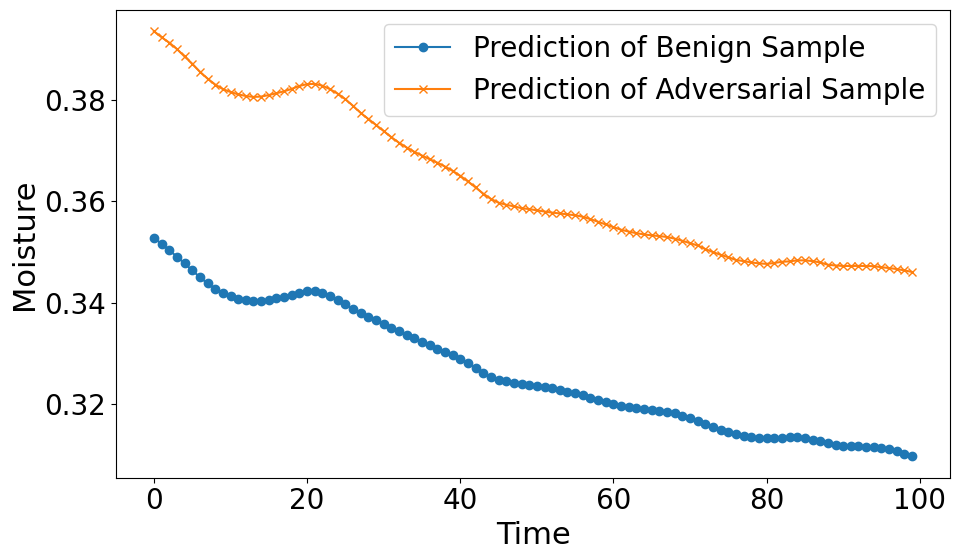

In [38]:
# %matplotlib qt

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the time-series data for the benign and adversarial samples
ax.plot(original_predictions[0:num_samples], label='Prediction of Benign Sample', linestyle='-', marker='o')
ax.plot(adversarial_predictions, label='Prediction of Adversarial Sample', linestyle='-', marker='x')

ax.set_xlabel('Time')
ax.set_ylabel('Moisture')
# ax.set_title('Perturbation Amplitude Comparison for Time-Series Feature')
ax.legend()
# Set y-axis limits to [0, 1]
# ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()